In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import umap.umap_ as umap

In [120]:
import pickle

with open("./data/Cross_vec_index.pkl", "rb") as f:
    cross_vec_lyric = pickle.load(f)

with open("./data/Cross_vec_index_diary.pkl", "rb") as f:
    cross_vec_diary = pickle.load(f)

cross_vec_lyric = np.array(cross_vec_lyric)
cross_vec_diary = np.array(cross_vec_diary)
cross_data = np.concat([cross_vec_lyric, cross_vec_diary], axis=0)

In [ ]:
umap_model = umap.UMAP(n_components=3, random_state=42)
umap_model.fit(cross_data)

/Users/yunsehyeog/anaconda3/envs/NLP/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



,n_neighbors,15
,n_components,3
,metric,'euclidean'
,metric_kwds,None
,output_metric,'euclidean'
,output_metric_kwds,None
,n_epochs,None
,learning_rate,1.0
,init,'spectral'
,min_dist,0.1
,spread,1.0


In [151]:
import plotly.express as px

data = pd.read_csv("./data/train.csv")

def draw_3D(data, emotion : str):
    emotion_index = data[data["emotion"] == emotion].index
    lyric = cross_vec_lyric[emotion_index]
    diary = cross_vec_diary[emotion_index]
    lyric_diary = np.concat([lyric, diary], axis=0)

    X_umap3 = umap_model.transform(lyric_diary)
    labels = ["Diary"] * len(emotion_index) + ["Lyric"] * len(emotion_index)

    fig = px.scatter_3d(
        x=X_umap3[:,0], 
        y=X_umap3[:,1], 
        z=X_umap3[:,2],
        color=labels
    )

    fig.update_traces(marker=dict(size=1.8))  # 점 크기 조절
    fig.write_html("Cross_3D.html")
    fig.show()
    

draw_3D(data, "분노")

In [130]:
umap_model_2d = umap.UMAP(n_components=2, random_state=42)
umap_model_2d.fit(cross_data)
X_umap2 = umap_model_2d.transform(cross_data)

/Users/yunsehyeog/anaconda3/envs/NLP/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



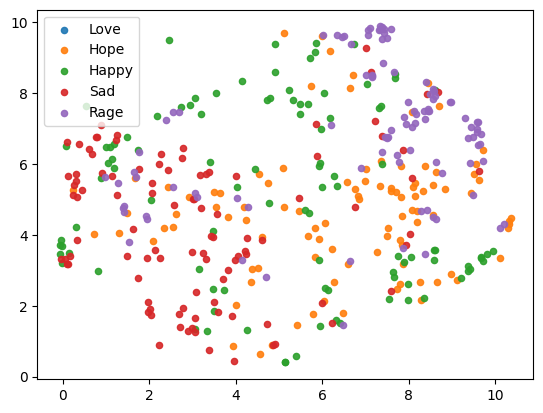

In [131]:
def draw_scatter(data, X_umap2, size=20, alpha=0.9, sample_num=100):
    love = data[data["emotion"] == "시링"].iloc[:sample_num].index
    hope = data[data["emotion"] == "희망"].iloc[:sample_num].index
    happy = data[data["emotion"] == "행복"].iloc[:sample_num].index
    sad = data[data["emotion"] == "슬픔"].iloc[:sample_num].index
    rage = data[data["emotion"] == "분노"].iloc[:sample_num].index

    plt.scatter(X_umap2[love, 0], X_umap2[love, 1], s=size, alpha=alpha)
    plt.scatter(X_umap2[hope, 0], X_umap2[hope, 1], s=size, alpha=alpha)
    plt.scatter(X_umap2[happy, 0], X_umap2[happy, 1], s=size, alpha=alpha)
    plt.scatter(X_umap2[sad, 0], X_umap2[sad, 1], s=size, alpha=alpha)
    plt.scatter(X_umap2[rage, 0], X_umap2[rage, 1], s=size, alpha=alpha)
    plt.legend(["Love", "Hope", "Happy", "Sad", "Rage"])

draw_scatter(data, X_umap2)